In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r"C:\Users\babuk\Downloads\unified mentor project 2\drugs_side_effects_drugs_com.xlsx")

In [5]:
df.head(5)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",0.87,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",0.82,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",0.48,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,0.41,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",0.39,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [6]:
df.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [7]:
df_cleaned=df.dropna()

In [8]:
df_filled=df.fillna('unknown')

In [9]:
df.describe()

,activity,rating,no_of_reviews
count,2931.000000,1586.000000,1586.000000
mean,0.084504,6.812926,75.064943
std,0.169333,2.313044,184.900847
min,0.000000,0.000000,1.000000
25%,0.000000,5.600000,2.000000
50%,0.020000,7.000000,12.000000
75%,0.070000,8.500000,58.000000
max,1.000000,10.000000,2934.000000


## rating

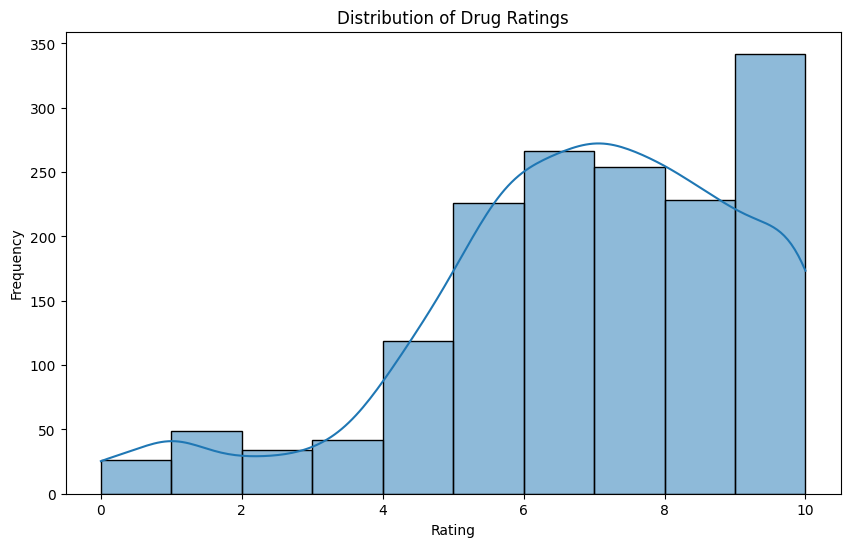

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


## top 10 of drugs

In [15]:
top_drugs=df.groupby('medical_condition')['drug_name'].value_counts().nlargest(10)

In [16]:
print(top_drugs)

medical_condition  drug_name     
Acne               minocycline       2
Eczema             fluocinolone      2
Herpes             acyclovir         2
ADHD               Adderall          1
                   Adderall XR       1
                   Adhansia XR       1
                   Adzenys ER        1
                   Adzenys XR-ODT    1
                   Aptensio XR       1
                   Azstarys          1
Name: count, dtype: int64


In [18]:
side_effects=df['side_effects'].value_counts().head(10)

In [19]:
print(side_effects)

side_effects
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: redness or swelling of the treated area; increased pain; or severe burning or skin irritation such as a rash, itching, pain, or blistering. Less serious side effects may be more likely, and you may have none at all.                                                                                                                                                                                           10
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: bone pain, muscle weakness; confusion, changes in your mental state, seizure (convulsions); or pale skin, feeling light-headed or short of breath, rapid heart rate. Less serious side effects may be more

In [26]:
df.shape

(2931, 17)

## replace and convert the str into float

In [27]:
df['activity']=df['activity'].astype(str).str.replace(r'\s+','',regex=True).str.rstrip('%'). astype('float')/100

In [28]:
print(df['activity'].head())

0    0.0087
1    0.0082
2    0.0048
3    0.0041
4    0.0039
Name: activity, dtype: float64


## find the null values and sum

In [35]:
df.isnull().sum().sum()

np.int64(7405)

In [33]:
print("There are {} missing values in this dataset".format(df.isnull().sum().sum()))
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
print('Number of missing values:')


There are 7405 missing values in this dataset
Number of instances = 2931
Number of attributes = 17
Number of missing values:


In [36]:
df['pregnancy_category']=df['pregnancy_category'].replace(np.nan,'unknown')

In [38]:
df['pregnancy_category']

0             D
1             C
2             D
3             X
4             B
         ...   
2926          X
2927          C
2928          C
2929    unknown
2930    unknown
Name: pregnancy_category, Length: 2931, dtype: object

In [3]:
df['no_of_reviews'] = pd.to_numeric(df['no_of_reviews'],
errors='coerce')

## no of reviews

In [4]:
df['no_of_reviews']

0       760.0
1       449.0
2       482.0
3       623.0
4       146.0
        ...  
2926     17.0
2927      NaN
2928      NaN
2929      NaN
2930      NaN
Name: no_of_reviews, Length: 2931, dtype: float64

## drug name

In [6]:
df['drug_name']

0          doxycycline
1       spironolactone
2          minocycline
3             Accutane
4          clindamycin
             ...      
2926     benzphetamine
2927      fenfluramine
2928       Fendique ER
2929          Imcivree
2930     setmelanotide
Name: drug_name, Length: 2931, dtype: object

## version copy

In [7]:
data_version2=df.copy()

In [8]:
print(data_version2.head())

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  \
0         Miscellaneous antimalarials, Tetracyclines   
1  Aldosterone receptor antagonists, Potassium-sp...   
2                                      Tetracyclines   
3  Miscellaneous antineoplastics, Miscellaneous u...   
4       Topical acne a

## no of unique in pregency categories

In [9]:
df['pregnancy_category'].unique()

array(['D', 'C', 'X', 'B', 'N', nan, 'A'], dtype=object)

## uniques

In [10]:
df['rx_otc'].unique()

array(['Rx', 'Rx/OTC', 'OTC', nan], dtype=object)

## medical condition

In [11]:
df['medical_condition'].unique()

array(['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina',
       'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer',
       'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19',
       'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea',
       'Eczema', 'Erectile Dysfunction', 'Gastrointestinal',
       'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes',
       'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'Incontinence',
       'Insomnia', 'Menopause', 'Migraine', 'Osteoarthritis',
       'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis',
       'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke',
       'Swine Flu', 'UTI', 'Weight Loss'], dtype=object)